In [22]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import StandardScaler

In [23]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data_path = Path('Resources/Healthcare-Diabetes.csv')
df1 = pd.read_csv(data_path) #df1 saved for testing
df=df1

# Review the DataFrame
df.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# Create a SQLite database and a table with the appropriate schema
conn = sqlite3.connect('diabetes.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS movies (
        id INTEGER PRIMARY KEY,
        Pregnancies INTEGER,
        Glucose INTEGER,
        BloodPressure INTEGER,
        SkinThickness INTEGER,
        BMI FLOAT,
        DiabetesPedigreeFunction FLOAT,
        Age INTEGER,
        Outcome INTEGER
    );
''')

# Insert data into the table
df.to_sql('diabetes', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [25]:
# Note: When cleaning the code - Data polishing and cleaning of out dataframe  
# was directly integrated into the SQL queries for clean and efficiency

# Create a SQLite database connection
conn = sqlite3.connect('diabetes.db')

# Execute the SQL queries and load the result into a DataFrame

# Separate the data into labels and features
# Separate the y variable, the labels
y_query = "SELECT Outcome FROM diabetes"

# Separate the X variable, the features
X_query = "SELECT Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age FROM diabetes"

# Query for value count and pie chart
outcome_pie_qry="SELECT Outcome, COUNT(*) AS count FROM diabetes GROUP BY Outcome"

y = pd.read_sql_query(y_query, conn)
X = pd.read_sql_query(X_query, conn)
outcome_pie = pd.read_sql_query(outcome_pie_qry, conn)



# Close the connection
conn.close()

# Display the DataFrame
#test.head(3)

<Axes: >

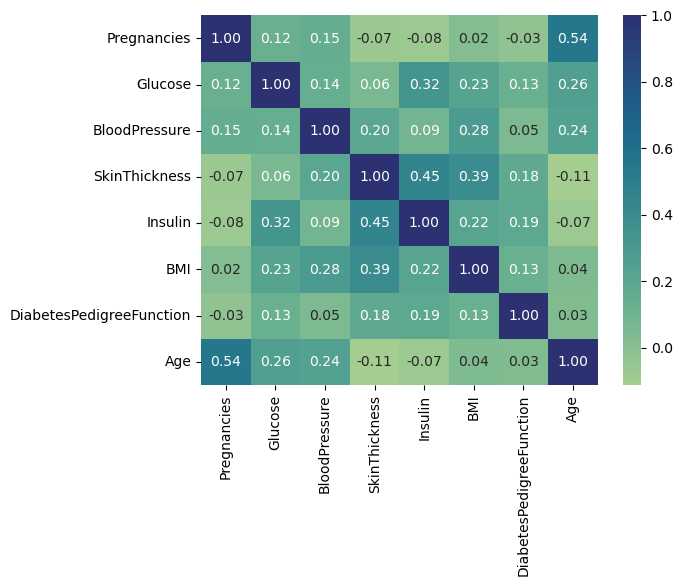

In [26]:
#correlation matrix + showcase heatmap with correlation values
correl_data=X.corr()
sns.heatmap(correl_data, annot=True, fmt=".2f", cmap="crest")

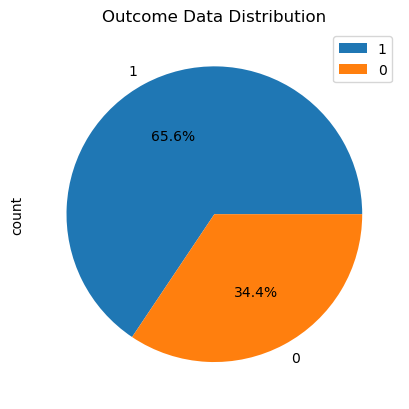

In [27]:
# Review the y variable Series
#y.head()

# Review the X variable DataFrame
#X.head()

# Check the balance of our target values
# y.value_counts()

# Asigning variable to value_count
value_counts_series = y.value_counts()

# Creating a pie chart for outcome distro
outcome_pie.plot(kind='pie', y='count', labels=df['Outcome'], autopct='%1.1f%%')
plt.title('Outcome Data Distribution')

# Display pie chart
plt.show()

In [28]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [30]:
# Reshape y to a 1D array (n_samples, ) using ravel() to resolve the warning about data shape.
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

ml_models = {
    'Model': ['SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'GBM', 'Logistic Regression'],
    'Accuracy': [svm_accuracy, knn_accuracy, nb_accuracy, dt_accuracy, rf_accuracy, gbm_accuracy, lr_accuracy]
}
ml_models = pd.DataFrame(ml_models)
ml_models

,Model,Accuracy
0,SVM,0.817919
1,KNN,0.854046
2,Naive Bayes,0.741329
3,Decision Tree,0.991329
4,Random Forest,0.995665
5,GBM,0.869942
6,Logistic Regression,0.767341


<Axes: >

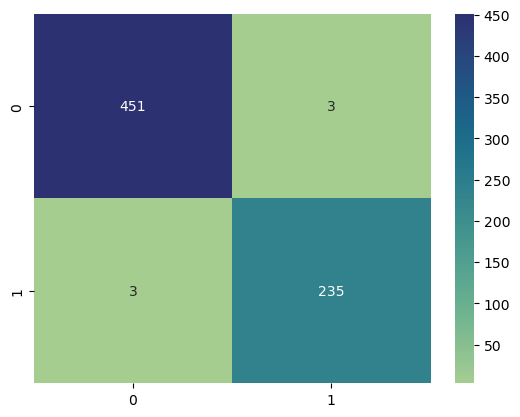

In [31]:
# Generate a confusion matrix for the model DECISION TREE!
confusion = confusion_matrix(y_test, dt_predictions)
#print(confusion)
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt=".0f", cmap="crest")


<Axes: >

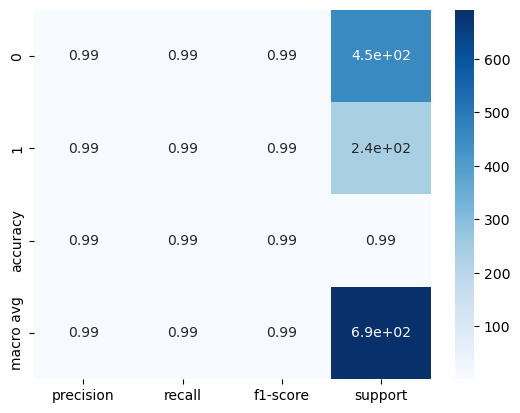

In [32]:
# Print the classification report for the model DECISION TREE!
classification_rep = classification_report(y_test, dt_predictions, output_dict=True)
classification_rep = pd.DataFrame(classification_rep).transpose()

#print(f"Classification report:\n {classification_rep}")

# Plot heatmap
sns.heatmap(classification_rep.iloc[:-1, :].astype(float), annot=True, cmap="Blues")

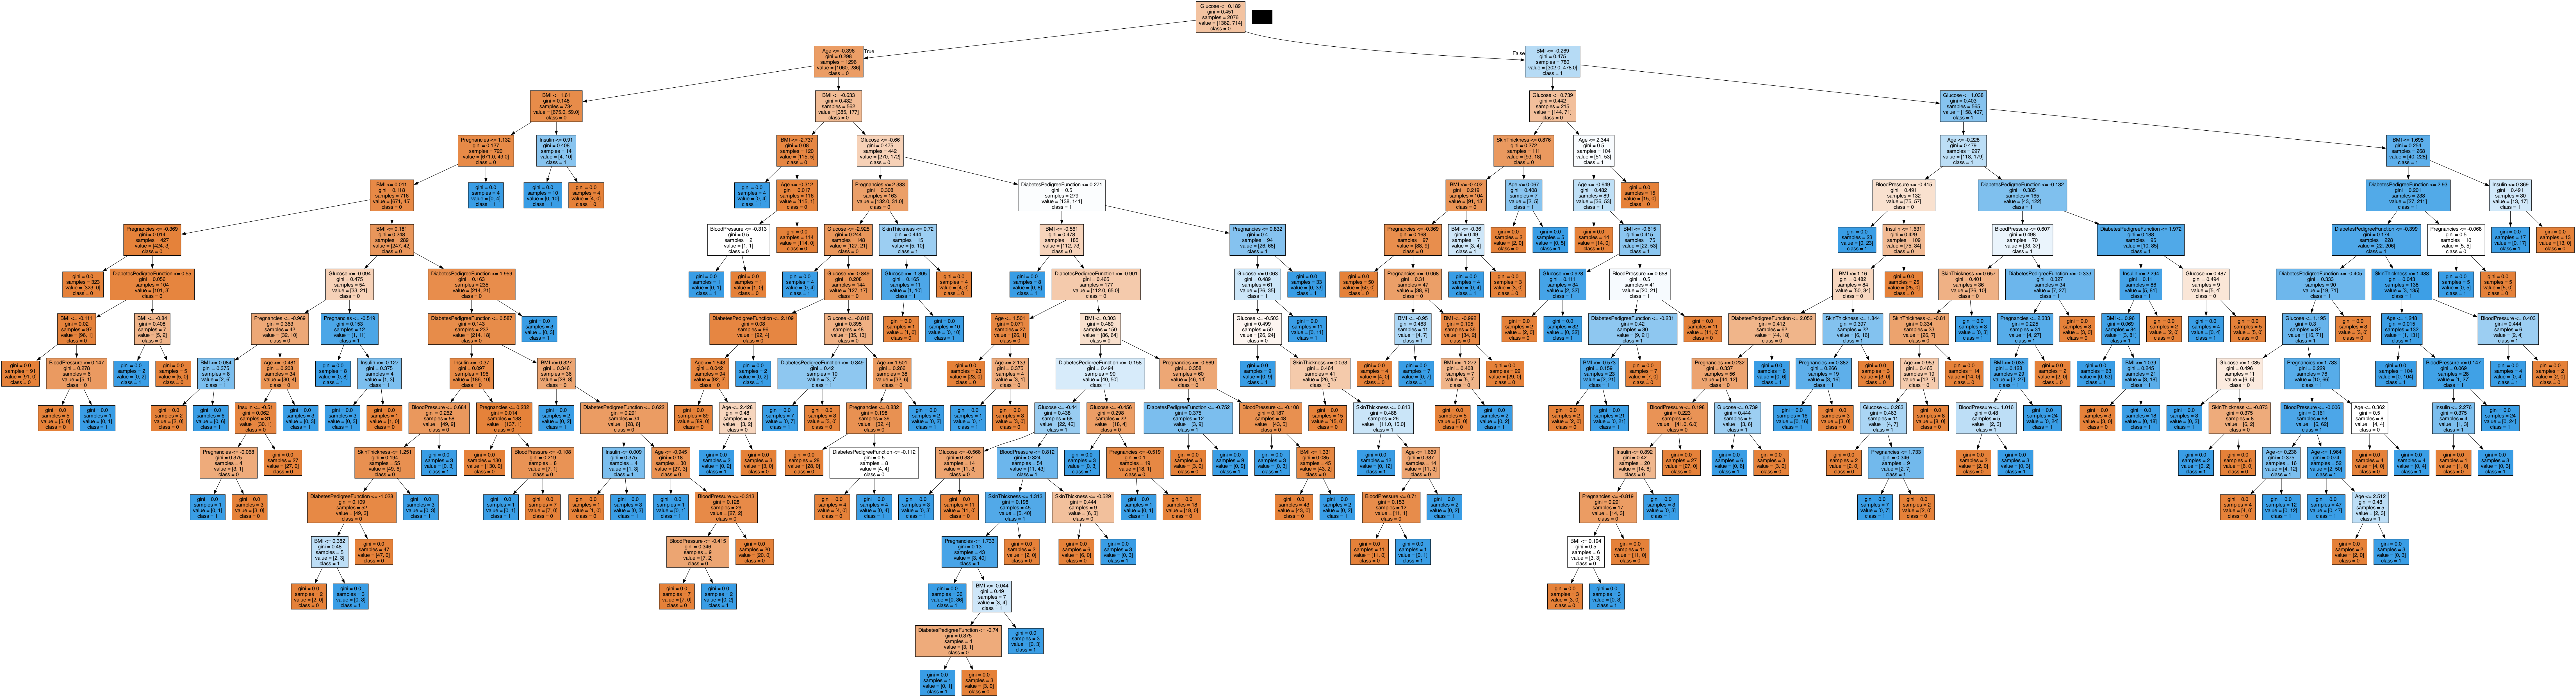

In [33]:
# Plotting decision tree logic
dot_data=tree.export_graphviz(
    dt_model, out_file=None , feature_names=X.columns, class_names=["0","1"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Create the PNG 
png_image = graph.create_png()

# Display the PNG 
Image(png_image)



In [34]:
#z=input("Provide an ID number? ")
a=input("How many pregnancies have you had? ")
b=input("What is your Glucose? ")
c=input("What is your Blood Pressure? ")
d=input("What is your Skin Thickness? ")
e=input("What is your Insulin? ")
f=input("What is your BMI? ")
g=input("What is your Diabetes Pedigree Function? ")
h=input("What is your Age? ")

How many pregnancies have you had? 3
What is your Glucose? 101
What is your Blood Pressure? 80
What is your Skin Thickness? 33
What is your Insulin? 90
What is your BMI? 40
What is your Diabetes Pedigree Function? .8
What is your Age? 72


In [35]:
data = {
    'Pregnancies': [a],
    'Glucose': [b],
    'BloodPressure': [c],
    'SkinThickness': [d],
    'Insulin': [e],
    'BMI': [f],
    'DiabetesPedigreeFunction': [g],
    'Age': [h]
}
pred_df = pd.DataFrame(data)
pred_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,101,80,33,90,40,.8,72


In [36]:
pred_df = pred_df.values
dt_predictions = dt_model.predict(pred_df)
dt_predictions=dt_predictions[0]

if dt_predictions==1:
    print("According to our model, you might have Diabetes! Please check-in with a doc!")
elif dt_predictions==0:
    print("According to our model, you might NOT have Diabetes! Please check-in with a doc anyways!")


According to our model, you might NOT have Diabetes! Please check-in with a doc anyways!


In [37]:
#Create a csv for use in Tableau
ml_models.to_csv("models.csv")